In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from time import time
import pandas as pd
import os
import graphviz
import pydot
from IPython.display import Image

# Problem 1
Use scikit learn's decision tree classifier  to predict survival for the titanic dataset (use an 80-20 train-test split).  Experiment with `max_depth` in range(2,10) and `min_samples_leaf` in range(1,102,10) and compare training time and prediction accuracy.  Use the `graphviz` module to draw your most accurate `max_depth=3` tree.  Interpret the results.

In [2]:
# Import dataset.
data = pd.read_csv('titanic.csv')
# Test train split.
x = data.filter(['Pclass','Sex','Age'])
x = x.fillna(0)
x = x.replace(to_replace='male',value=1)
x = x.replace(to_replace='female',value=0)
y = list(data['Survived'])
tr_x, ts_x, tr_y, ts_y = train_test_split(x,y,test_size=0.2)
combo = []
train_times = []
accs = []
# Experiment with max_depth and min_samples_leaf.
for max_depth in range(2,10) :
    for min_samples_leaf in range(1,102,10) :
        combo.append((max_depth,min_samples_leaf))
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
        start = time()
        clf.fit(tr_x,tr_y)
        end = time()
        train_times.append(end-start)
        y_hat = clf.predict(ts_x)
        accuracy = sum([int(ts_y[i] == y_hat[i]) for i in range(len(y_hat))])/len(y_hat)
        accs.append(accuracy)

In [3]:
print('Depth\tMin Samples\tTime\t\t\tAccuracy')
for i in range(len(combo)) :
    print(str(combo[i][0])+'\t'+str(combo[i][1])+'\t\t'+str(train_times[i])+'\t'+str(accs[i]))

Depth	Min Samples	Time			Accuracy
2	1		0.01663494110107422	0.7597765363128491
2	11		0.0008447170257568359	0.7597765363128491
2	21		0.0006310939788818359	0.7597765363128491
2	31		0.0006229877471923828	0.7597765363128491
2	41		0.0006229877471923828	0.7597765363128491
2	51		0.0006241798400878906	0.7597765363128491
2	61		0.0009291172027587891	0.7597765363128491
2	71		0.0007009506225585938	0.7597765363128491
2	81		0.0005638599395751953	0.7597765363128491
2	91		0.0005788803100585938	0.7597765363128491
2	101		0.0005528926849365234	0.7597765363128491
3	1		0.0005910396575927734	0.7988826815642458
3	11		0.0005471706390380859	0.7988826815642458
3	21		0.0005421638488769531	0.776536312849162
3	31		0.0005450248718261719	0.776536312849162
3	41		0.0005393028259277344	0.776536312849162
3	51		0.0005297660827636719	0.770949720670391
3	61		0.0006530284881591797	0.7597765363128491
3	71		0.0006887912750244141	0.7597765363128491
3	81		0.0005280971527099609	0.7597765363128491
3	91		0.0005230903625488281	0.759

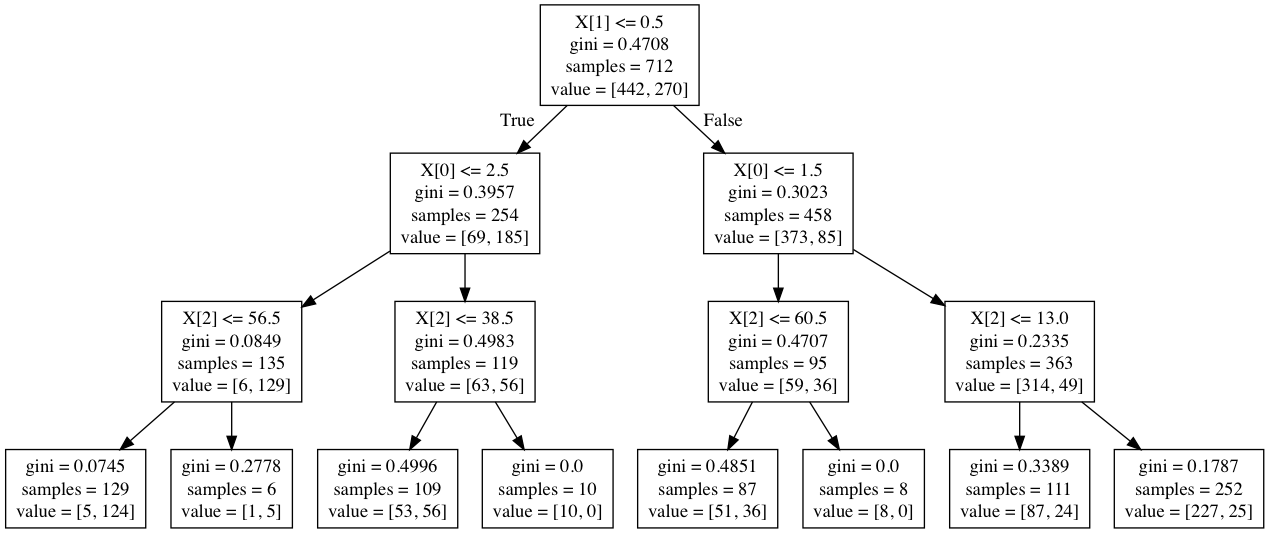

In [4]:
# Use graphviz module
mst_acc_dep_3 = accs.index(max([accs[i] for i in range(11,22)]))
depth,min_leaf = combo[mst_acc_dep_3][0],combo[mst_acc_dep_3][1]
clf = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=min_leaf)
clf.fit(tr_x,tr_y)
export_graphviz(clf, out_file='tree1.dot')
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')
Image('tree1.png')

The first predictor is whether you're male or female, predictably.  From there it splits it off into class, followed by age.  Class takes higher priority, and the age split is different for different classes.  Most drasticly is the split in third class or lower for females at age five, and first class for males at age thirty-six and a half.

# Problem 2
Do the same thing as #1, but on a large dataset related to your final project. 

In [5]:
path = '../../../../Senior Project/DATA/'

train = []
test = []

# Walk through player files
for dir_path , dir_name , file_names in os.walk(path) :
    # 2017 will be our testing set
    if '2017' in dir_path :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(test,list) :
                    test = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    test = np.vstack((test,data.drop(['Unnamed: 0'],axis=1)))
    # Everything else will become our training set
    else :
        for name in file_names :
            # Grab avgs file
            if name[-4:] == 'avgs' :
                data = pd.read_csv(os.path.join(dir_path,name))
                if isinstance(train,list) :
                    train = data.drop(['Unnamed: 0'],axis=1).as_matrix()
                else :
                    train = np.vstack((train,data.drop(['Unnamed: 0'],axis=1).as_matrix()))

# From the way the data is saved, the last column is whether or not the player
#     is a score on how much of a contributor he was during the season.
train_x = train[:,:-1]
train_y = train[:,-1]
test_x = test[:,:-1]
test_y = test[:,-1]

In [6]:
combo = []
train_times = []
accs = []
# Experiment with max_depth and min_samples_leaf.
for max_depth in range(2,10) :
    for min_samples_leaf in range(1,102,10) :
        combo.append((max_depth,min_samples_leaf))
        clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
        start = time()
        clf.fit(train_x,train_y)
        end = time()
        train_times.append(end-start)
        y_hat = clf.predict(test_x)
        accuracy = sum([int(test_y[i] == y_hat[i]) for i in range(len(y_hat))])/len(y_hat)
        accs.append(accuracy)

In [7]:
print('Depth\tMin Samples\tTime\t\t\tAccuracy')
for i in range(len(combo)) :
    print(str(combo[i][0])+'\t'+str(combo[i][1])+'\t\t'+str(train_times[i])+'\t'+str(accs[i]))

Depth	Min Samples	Time			Accuracy
2	1		0.01956486701965332	0.8580729166666666
2	11		0.022066831588745117	0.8580729166666666
2	21		0.017580747604370117	0.8580729166666666
2	31		0.016829967498779297	0.8580729166666666
2	41		0.01746201515197754	0.8580729166666666
2	51		0.0131378173828125	0.8580729166666666
2	61		0.013043880462646484	0.8580729166666666
2	71		0.011570930480957031	0.8580729166666666
2	81		0.014583110809326172	0.8580729166666666
2	91		0.01129603385925293	0.8580729166666666
2	101		0.013791799545288086	0.8580729166666666
3	1		0.020039796829223633	0.8580729166666666
3	11		0.01656818389892578	0.8580729166666666
3	21		0.014880180358886719	0.8580729166666666
3	31		0.015489816665649414	0.8580729166666666
3	41		0.015324831008911133	0.8580729166666666
3	51		0.01495504379272461	0.8580729166666666
3	61		0.015645980834960938	0.8580729166666666
3	71		0.019784212112426758	0.8580729166666666
3	81		0.02005600929260254	0.8580729166666666
3	91		0.01912689208984375	0.8580729166666666
3	101		0.0

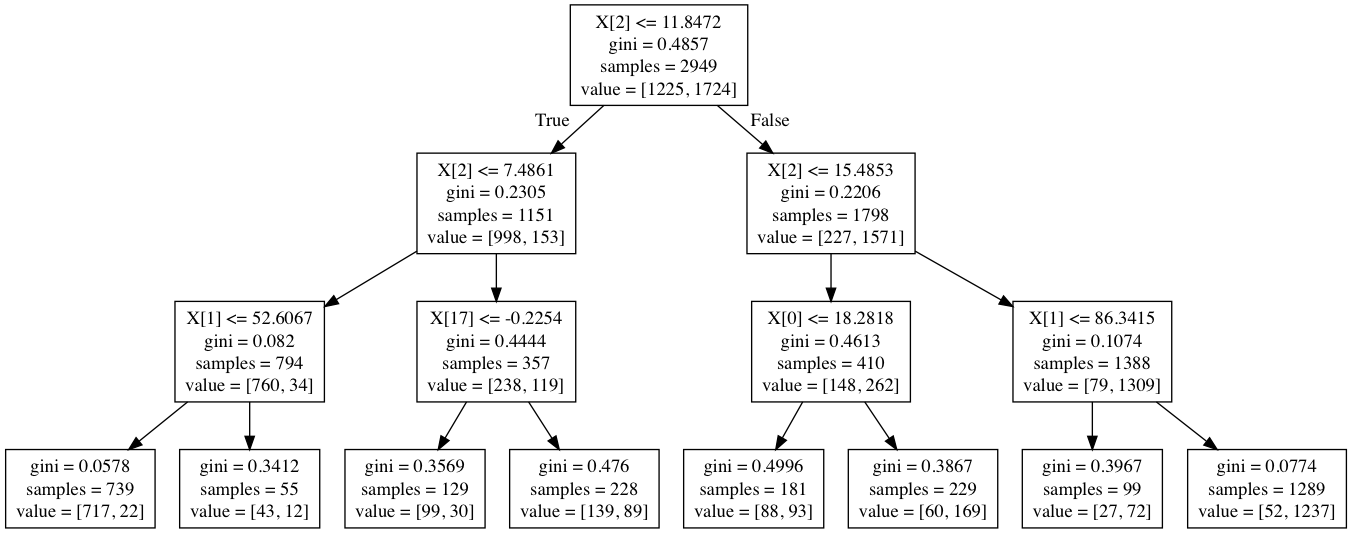

In [8]:
# Use graphviz module
mst_acc_dep_3 = accs.index(max([accs[i] for i in range(11,22)]))+11
depth,min_leaf = combo[mst_acc_dep_3][0],combo[mst_acc_dep_3][1]
clf = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=min_leaf)
clf.fit(train_x,train_y)
export_graphviz(clf, out_file='tree2.dot')
(graph,) = pydot.graph_from_dot_file('tree2.dot')
graph.write_png('tree2.png')
Image('tree2.png')

The biggest splits (first two in fact) occur over the average percent of possessions used during a game.  The first occurs at 11.8472%, the second at 7.4861% for the left branch and 15.4853% for the right.  After that, there are three factors that led to different splits.  Two of the branches were split on offensive rating.  These were the lowest (furthest left) and highest (furthest right) splits.  The middle splits happened at Points Prevented (for the left), and at minutes per game (for the right).  This indicates that the most telling factor for whether a player will play during the tournament or not is how much they played during the season, followed by offensive performance.

# Problem 3
Use scikit-learn's tree regression on the boston housing dataset to predict housing prices (with 3-fold cross validation). Experiment with `max_depth` in range(2,10) and `min_samples_leaf` in range(1,102,10) and compare training time and prediction accuracy.  Use the `graphviz` module to draw your most accurate `max_depth=3` tree.  Interpret the results.

In [9]:
# Import dataset.
data = datasets.load_boston()
# Test train split.
x = data.data
y = data.target
combo = []
train_times = []
accs = []
# Experiment with max_depth and min_samples_leaf.
for max_depth in range(2,10) :
    for min_samples_leaf in range(1,102,10) :
        combo.append((max_depth,min_samples_leaf))
        clf = DecisionTreeRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
        start = time()
        accuracy = np.average(cross_val_score(clf,x,y,cv=3))
        end = time()
        train_times.append(end-start)
        accs.append(accuracy)

In [10]:
print('Depth\tMin Samples\tTime\t\t\tAccuracy')
for i in range(len(combo)) :
    print(str(combo[i][0])+'\t'+str(combo[i][1])+'\t\t'+str(train_times[i])+'\t'+str(accs[i]))

Depth	Min Samples	Time			Accuracy
2	1		0.007409811019897461	0.29164193571
2	11		0.0064618587493896484	0.29164193571
2	21		0.00531005859375	0.305221297319
2	31		0.006926298141479492	0.310910491358
2	41		0.006414890289306641	0.267629852961
2	51		0.004857063293457031	0.208624105624
2	61		0.0065882205963134766	0.221244752025
2	71		0.008003950119018555	0.132566613173
2	81		0.00798487663269043	0.0363453466752
2	91		0.009690046310424805	0.00741814359467
2	101		0.006536006927490234	-0.0247254006144
3	1		0.008049964904785156	0.303794183033
3	11		0.010009050369262695	0.431693608287
3	21		0.010203838348388672	0.4310312503
3	31		0.010349035263061523	0.405594749951
3	41		0.009490966796875	0.353981499419
3	51		0.011838197708129883	0.273686095461
3	61		0.006721019744873047	0.28551441092
3	71		0.0067729949951171875	0.187896135644
3	81		0.00771784782409668	0.0363453466752
3	91		0.008267879486083984	0.00741814359467
3	101		0.007848978042602539	-0.0247254006144
4	1		0.01159811019897461	0.372299055967
4	1

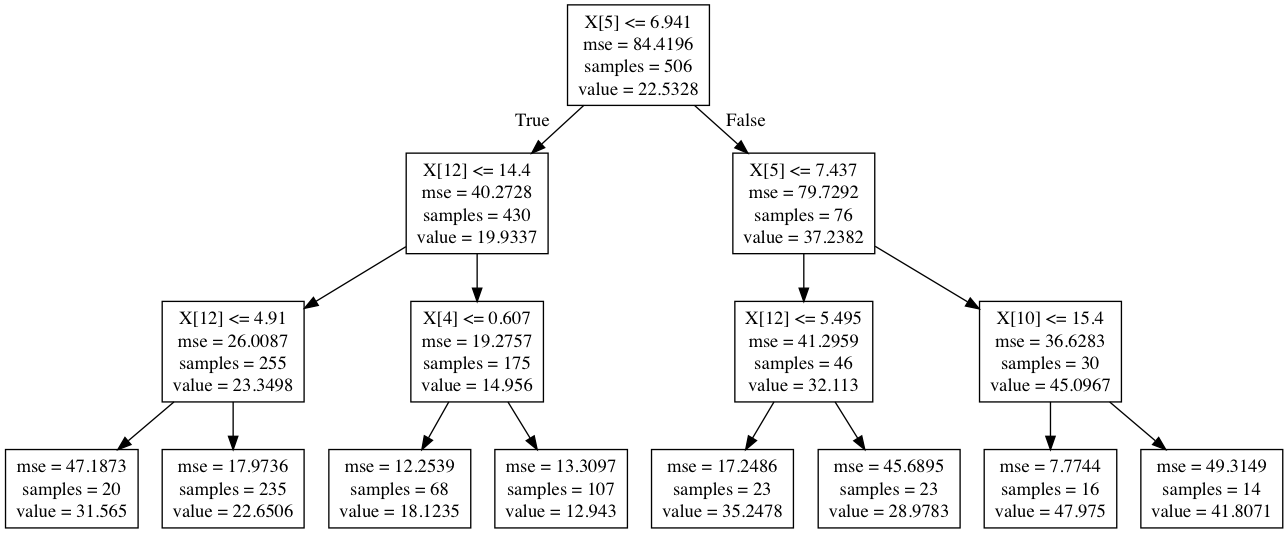

In [11]:
# Use graphviz module
mst_acc_dep_3 = accs.index(max([accs[i] for i in range(11,22)]))
depth,min_leaf = combo[mst_acc_dep_3][0],combo[mst_acc_dep_3][1]
clf = DecisionTreeRegressor(max_depth=depth,min_samples_leaf=min_leaf)
clf.fit(x,y)
export_graphviz(clf, out_file='tree3.dot')
(graph,) = pydot.graph_from_dot_file('tree3.dot')
graph.write_png('tree3.png')
Image('tree3.png')

# Problem 4
Do the same thing as #3, but on a large dataset related to your final project. 

In [12]:
combo = []
train_times = []
accs = []
# Experiment with max_depth and min_samples_leaf.
for max_depth in range(2,10) :
    for min_samples_leaf in range(1,102,10) :
        combo.append((max_depth,min_samples_leaf))
        clf = DecisionTreeRegressor(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
        start = time()
        clf.fit(train_x,train_y)
        end = time()
        train_times.append(end-start)
        y_hat = clf.predict(test_x)
        accuracy = sum([int(test_y[i] == y_hat[i]) for i in range(len(y_hat))])/len(y_hat)
        accs.append(accuracy)

In [13]:
print('Depth\tMin Samples\tTime\t\t\tAccuracy')
for i in range(len(combo)) :
    print(str(combo[i][0])+'\t'+str(combo[i][1])+'\t\t'+str(train_times[i])+'\t'+str(accs[i]))

Depth	Min Samples	Time			Accuracy
2	1		0.014594078063964844	0.0
2	11		0.013494014739990234	0.0
2	21		0.014302968978881836	0.0
2	31		0.024065017700195312	0.0
2	41		0.017667770385742188	0.0
2	51		0.011332988739013672	0.0
2	61		0.01299595832824707	0.0
2	71		0.011130809783935547	0.0
2	81		0.01081395149230957	0.0
2	91		0.010824918746948242	0.0
2	101		0.010783910751342773	0.0
3	1		0.014967679977416992	0.0
3	11		0.0177919864654541	0.0
3	21		0.01487112045288086	0.0
3	31		0.017254114151000977	0.0
3	41		0.01624298095703125	0.0
3	51		0.014912128448486328	0.0
3	61		0.014449834823608398	0.0
3	71		0.01504206657409668	0.0
3	81		0.01629781723022461	0.0
3	91		0.015270233154296875	0.0
3	101		0.015649080276489258	0.0
4	1		0.019159793853759766	0.0
4	11		0.017440080642700195	0.0
4	21		0.017979145050048828	0.0
4	31		0.02111983299255371	0.0
4	41		0.02082681655883789	0.0
4	51		0.021153926849365234	0.0
4	61		0.025324106216430664	0.0
4	71		0.02562570571899414	0.0
4	81		0.023318052291870117	0.0
4	91		0.022168159

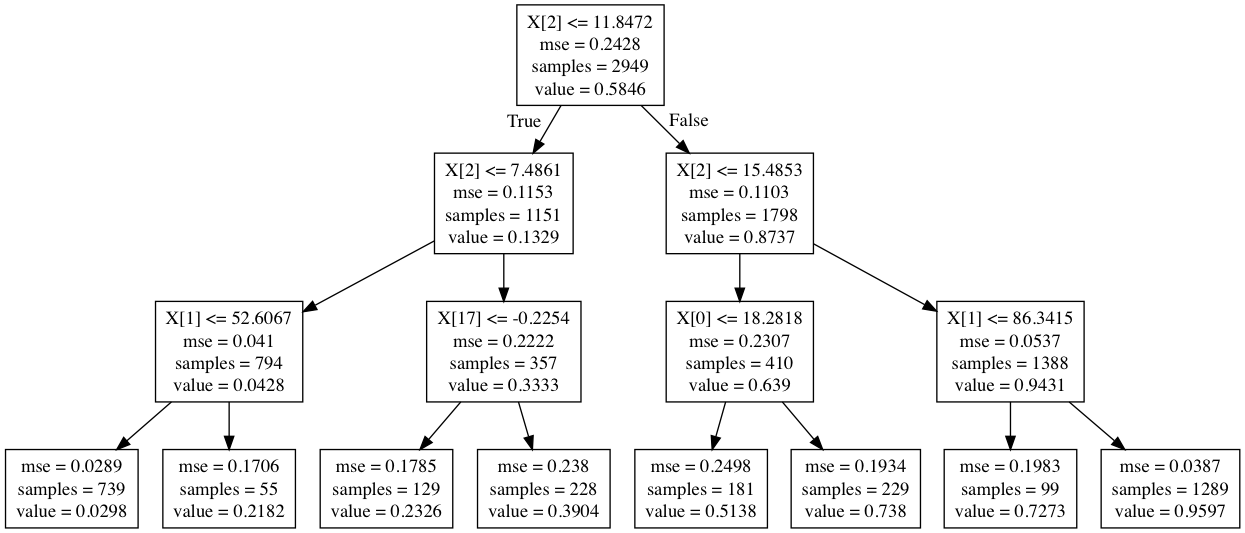

In [14]:
# Use graphviz module
mst_acc_dep_3 = accs.index(max([accs[i] for i in range(11,22)]))+11
depth,min_leaf = combo[mst_acc_dep_3][0],combo[mst_acc_dep_3][1]
clf = DecisionTreeRegressor(max_depth=depth,min_samples_leaf=min_leaf)
clf.fit(train_x,train_y)
export_graphviz(clf, out_file='tree4.dot')
(graph,) = pydot.graph_from_dot_file('tree4.dot')
graph.write_png('tree4.png')
Image('tree4.png')

The splits occur at the same places as in problem 2.  However, the accuracy is much worse.